In [50]:
# Useful starting lines
import numpy as np
import matplotlib.pyplot as plt

# Load the data

In [51]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [52]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [53]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx @ w
    return e.T.dot(e) / (2 * y.shape[0])

In [54]:
compute_loss(y, tx, np.array([1,2]))

2694.483365887085

# 2. Grid Search

Fill in the function `grid_search()` below:

In [55]:
# from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            losses[i,j] = compute_loss(y, tx, np.array([w0, w1]))
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.610085652488799, w0*=73.36683417085428, w1*=12.8140703517588, execution time=2.801 seconds


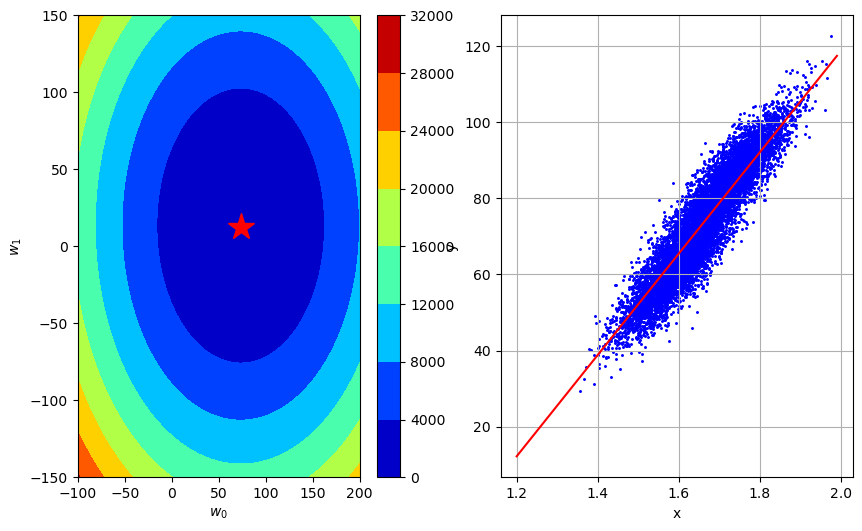

In [56]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [57]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    # ***************************************************
    e = y - tx @ w
    return - tx.T.dot(e) / y.shape[0]

In [58]:
[compute_gradient(y, tx, w) for w in [np.array([100,20]), np.array([70,12])]]

[array([26.706078  ,  6.52028757]), array([-3.293922  , -1.47971243])]

Please fill in the functions `gradient_descent` below:

In [59]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        grad_w = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w -= gamma * grad_w
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [60]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([-1000, 1000.])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=1062606.4462798769, w0=-463.3530389989468, w1=506.73985621749387
GD iter. 1/49: loss=265663.1509858701, w0=-195.02955849842033, w1=260.1097843262411
GD iter. 2/49: loss=66427.32716236892, w0=-60.86781824815742, w1=136.79474838061495
GD iter. 3/49: loss=16618.37120649382, w0=6.213051876973964, w1=75.13723040780187
GD iter. 4/49: loss=4166.132217525063, w0=39.75348693953961, w1=44.308471421395396
GD iter. 5/49: loss=1053.072470282885, w0=56.52370447082242, w1=28.894091928192196
GD iter. 6/49: loss=274.8075334723426, w0=64.90881323646381, w1=21.18690218159061
GD iter. 7/49: loss=80.2412992697075, w0=69.1013676192845, w1=17.33330730828982
GD iter. 8/49: loss=31.5997407190489, w0=71.19764481069485, w1=15.406509871639432
GD iter. 9/49: loss=19.439351081384252, w0=72.24578340640002, w1=14.44311115331424
GD iter. 10/49: loss=16.39925367196811, w0=72.7698527042526, w1=13.961411794151644
GD iter. 11/49: loss=15.639229319614081, w0=73.03188735317889, w1=13.720562114570345
GD i

In [61]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [62]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        # ***************************************************

        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [63]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2330.5865200388002, w0=5.693771233442, w1=5.693771233442
SGD iter. 1/49: loss=1873.4285316567345, w0=12.34478559603274, w1=12.34478559603274
SGD iter. 2/49: loss=1522.5644263679608, w0=18.633158459397826, w1=18.633158459397826
SGD iter. 3/49: loss=1307.2102317560425, w0=23.452188369419005, w1=23.452188369419005
SGD iter. 4/49: loss=1055.286841327161, w0=31.32588703370615, w1=31.32588703370615
SGD iter. 5/49: loss=1061.2999803794376, w0=31.079129540681492, w1=31.079129540681492
SGD iter. 6/49: loss=993.9196886619842, w0=34.21627283675429, w1=34.21627283675429
SGD iter. 7/49: loss=917.9161184089105, w0=40.54159068883836, w1=40.54159068883836
SGD iter. 8/49: loss=920.5133722752013, w0=46.65676643400124, w1=46.65676643400124
SGD iter. 9/49: loss=959.5792030748773, w0=50.44078054928006, w1=50.44078054928006
SGD iter. 10/49: loss=959.8185842848047, w0=50.45772804256777, w1=50.45772804256777
SGD iter. 11/49: loss=912.3535531100445, w0=44.97827840453069, w1=44.978278404530

In [64]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [65]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [66]:
y.shape, tx.shape

((200,), (200, 2))

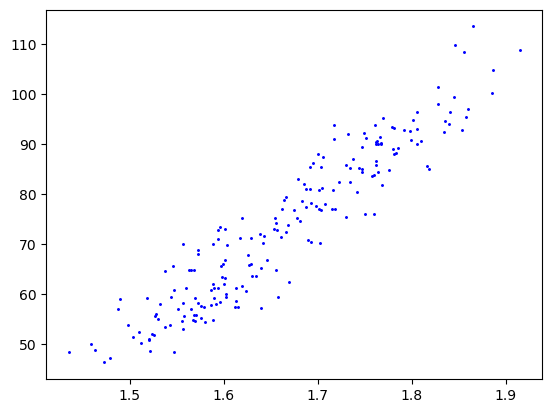

In [67]:
plt.scatter(height, weight, marker=".", color='b', s=5)


In [68]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0., 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points 
#       and the model fit
# ***************************************************
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)

end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
GD iter. 1/49: loss=267.05002587794297, w0=67.0053679383553, w1=13.172891437557826
GD iter. 2/49: loss=36.45002800750046, w0=71.64420110331837, w1=14.084860844773324
GD iter. 3/49: loss=15.696028199160661, w0=73.03585105280729, w1=14.358451666937965
GD iter. 4/49: loss=13.828168216410079, w0=73.45334603765397, w1=14.440528913587356
GD iter. 5/49: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
GD iter. 6/49: loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
GD iter. 7/49: loss=13.643569482174815, w0=73.62744144633503, w1=14.474755125440149
GD iter. 8/49: loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
GD iter. 9/49: loss=13.643435902354934, w0=73.63183766852546, w1=14.475619398847368
GD iter. 10/49: loss=13.643434909697557, w0=73.63214202236942, w1=14.475679233160175
GD iter. 11/49: loss=13.643434820358395, w0=73.6322333285226, w1=14.47569718345

In [69]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [110]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
# ***************************************************
height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [111]:
def compute_mae(y, tx, w):

    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - tx @ w
    return np.mean(np.abs(e))

In [112]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    # ***************************************************
    e = y - tx @ w
    abs_subgrad =  np.where(e >= 0, 1, -1) * np.where(e == 0, 0, 1)
    return -abs_subgrad.dot(tx) / y.shape[0]

In [113]:
compute_mae(y, tx, np.array([70, 15.]))

5.285319214221363

In [114]:
compute_subgradient_mae(y, tx, np.array([70, 100.]))

array([-0.0318   ,  0.8211088])

In [115]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        # ***************************************************
        loss = compute_mae(y, tx, w)
        grad_w = compute_subgradient_mae(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient
        # ***************************************************
        w -= gamma * grad_w
        
        ws.append(w)
        losses.append(loss)
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [132]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.2
batch_size = 1

# Initialization
w_initial = np.array([0, 0.])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=73.29392200210518, w0=0.2, w1=-2.1600499167107046e-16
SubGD iter. 1/499: loss=73.09392200210517, w0=0.4, w1=-4.320099833421409e-16
SubGD iter. 2/499: loss=72.89392200210517, w0=0.6000000000000001, w1=-6.480149750132114e-16
SubGD iter. 3/499: loss=72.69392200210518, w0=0.8, w1=-8.640199666842818e-16
SubGD iter. 4/499: loss=72.49392200210517, w0=1.0, w1=-1.0800249583553523e-15
SubGD iter. 5/499: loss=72.29392200210518, w0=1.2, w1=-1.2960299500264228e-15
SubGD iter. 6/499: loss=72.09392200210517, w0=1.4, w1=-1.5120349416974933e-15
SubGD iter. 7/499: loss=71.89392200210517, w0=1.5999999999999999, w1=-1.7280399333685638e-15
SubGD iter. 8/499: loss=71.69392200210518, w0=1.7999999999999998, w1=-1.944044925039634e-15
SubGD iter. 9/499: loss=71.49392200210517, w0=1.9999999999999998, w1=-2.1600499167107045e-15
SubGD iter. 10/499: loss=71.29392200210518, w0=2.1999999999999997, w1=-2.376054908381775e-15
SubGD iter. 11/499: loss=71.09392200210517, w0=2.4, w1=-2.5920599000528

In [133]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [124]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        # ***************************************************
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad = compute_subgradient_mae(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_mae(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [126]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=72.59392200210517, w0=0.7, w1=-1.0115814241869985
SubSGD iter. 1/499: loss=71.89392200210516, w0=1.4, w1=-1.3685920512528413
SubSGD iter. 2/499: loss=71.19392200210518, w0=2.0999999999999996, w1=-0.6728988521554239
SubSGD iter. 3/499: loss=70.49392200210517, w0=2.8, w1=1.0031491048938759
SubSGD iter. 4/499: loss=69.79392200210518, w0=3.5, w1=1.7245857131051727
SubSGD iter. 5/499: loss=69.09392200210519, w0=4.2, w1=2.6099896335201302
SubSGD iter. 6/499: loss=68.39392200210517, w0=4.9, w1=3.0028975866683516
SubSGD iter. 7/499: loss=67.69392200210518, w0=5.6000000000000005, w1=2.7593675892014358
SubSGD iter. 8/499: loss=66.99392200210517, w0=6.300000000000001, w1=2.1444793606736
SubSGD iter. 9/499: loss=66.29392200210518, w0=7.000000000000001, w1=0.7305908867765016
SubSGD iter. 10/499: loss=65.59392200210519, w0=7.700000000000001, w1=1.231025467579539
SubSGD iter. 11/499: loss=64.89392200210517, w0=8.4, w1=2.453204774277393
SubSGD iter. 12/499: loss=64.19392200210

In [128]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>